In [ ]:
import os


folder_path = r"D:\ML\New folder\PORJECT\emoji_text\emojitweets-01-04-2018.txt"

def load_and_preview_datasets(file_paths):
   
    previews = {}
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            previews[file_path] = [file.readline().strip() for _ in range(5)]  # Preview first 5 lines
    return previews


datasets_preview = load_and_preview_datasets([folder_path])


for file_path, preview in datasets_preview.items():
    print(f"Preview of {os.path.basename(file_path)}:")
    for line in preview:
        print(line)
    print("\n" + "="*50 + "\n")


Preview of emojitweets-01-04-2018.txt:
Squad arriving for Game 2 🚀
Dude is like 5’8 140 pounds his dick was long and strong(always the little dudes carrying the 🍆) 🤪🙃
FOLLOWERS👇
I CANT BREATIUHW 💀💀💀
2️⃣4️⃣ hours 'til our schedule drops!




In [ ]:
import os


folder_path = r"D:\ML\New folder\PORJECT\emoji_text\emojitweets-01-04-2018.txt"
output_file_path = r"D:\ML\New folder\PORJECT\emoji_text\first_30000_rows.txt"


def save_first_rows(input_file, output_file, max_rows=30000):
    try:
        with open(input_file, 'r', encoding='utf-8') as file:
            
            lines = [file.readline().strip() for _ in range(max_rows)]
        
        
        with open(output_file, 'w', encoding='utf-8') as output:
            output.write("\n".join(lines))
        
        print("Successfully saved the first 30,000 rows to the output file.")
    except Exception as e:
        print(f"An error occurred: {e}")

save_first_rows(folder_path, output_file_path)


Successfully saved the first 30,000 rows to the output file.


In [3]:
!pip install emoji

# DATA PREPROCESSING

## EMOJI EXTRACTION STOPWARD

In [ ]:
import pandas as pd
import re
import nltk
import string  
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
import contractions  

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')  

lemmatizer = WordNetLemmatizer()
english_words = set(nltk.corpus.words.words()) 

def preprocess_text(tweet, remove_stopwords=True, lemmatize=True):
    if not isinstance(tweet, str):  
        return ""
    
    tweet = contractions.fix(tweet)
    
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    tweet = re.sub(r'@\w+|#\w+', '', tweet)
    
    tweet = re.sub(r'\d+', '', tweet)
    
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = word_tokenize(tweet)
    words = [
        lemmatizer.lemmatize(word.lower()) 
        for word in words 
        if word.lower() not in stop_words and word.lower() in english_words
    ]
    
    return ' '.join(words)

def extract_emojis(text):
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

file_path = r"D:\ABT_TVL_015\PROJECT\EMOJII_NPL\emojii\first_30000_rows.txt"
output_csv_path = r"D:\ABT_TVL_015\PROJECT\EMOJII_NPL\emojii\processed_tweets_first_30000.csv"

try:
   
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    
    
    tweets = tweets[:30000]
    processed_data = []
    for tweet in tweets:
        cleaned_tweet = preprocess_text(tweet)
        emojis = extract_emojis(tweet)
        processed_data.append([cleaned_tweet, emojis])
    df = pd.DataFrame(processed_data, columns=["cleaned_text", "emojis"])
    df.to_csv(output_csv_path, index=False, encoding='utf-8')
    
    print(f"Processed tweets (first 10000 rows) saved to {output_csv_path}")

except Exception as e:
    print(f"An error occurred: {e}")
df.head()

[nltk_data] Downloading package punkt to C:\Users\AB
[nltk_data]     TECHNOLOGIES\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AB
[nltk_data]     TECHNOLOGIES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AB
[nltk_data]     TECHNOLOGIES\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\AB
[nltk_data]     TECHNOLOGIES\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Processed tweets (first 10000 rows) saved to D:\ABT_TVL_015\PROJECT\EMOJII_NPL\emojii\processed_tweets_first_30000.csv


,cleaned_text,emojis
0,squad game,🚀
1,dude like dick long little carrying,🍆🤪🙃
2,,👇
3,,💀💀💀
4,til schedule,


In [5]:
df.shape

(30000, 2)

C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129414 (\N{DUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK T

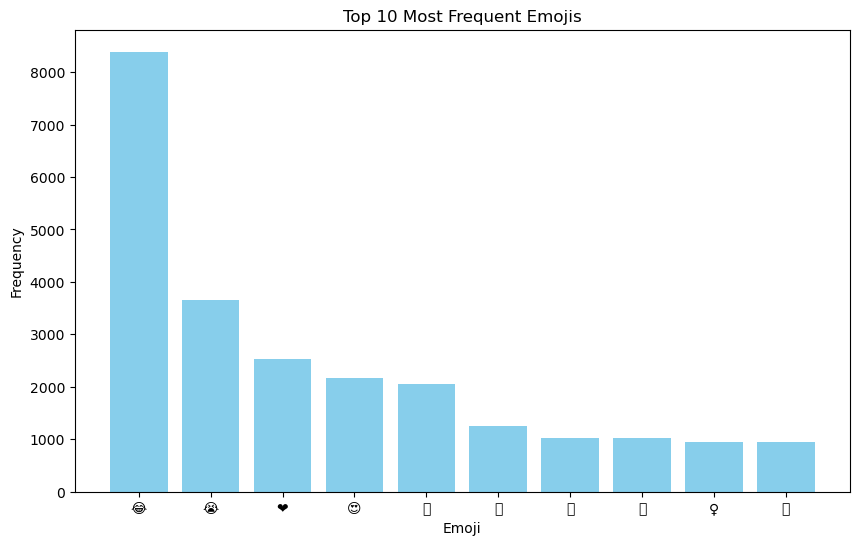

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
all_emojis = ''.join(df['emojis'])

emoji_counts = Counter(all_emojis)
emoji_df = pd.DataFrame(emoji_counts.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(emoji_df['emoji'][:10], emoji_df['count'][:10], color='skyblue')
plt.title('Top 10 Most Frequent Emojis')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.show()

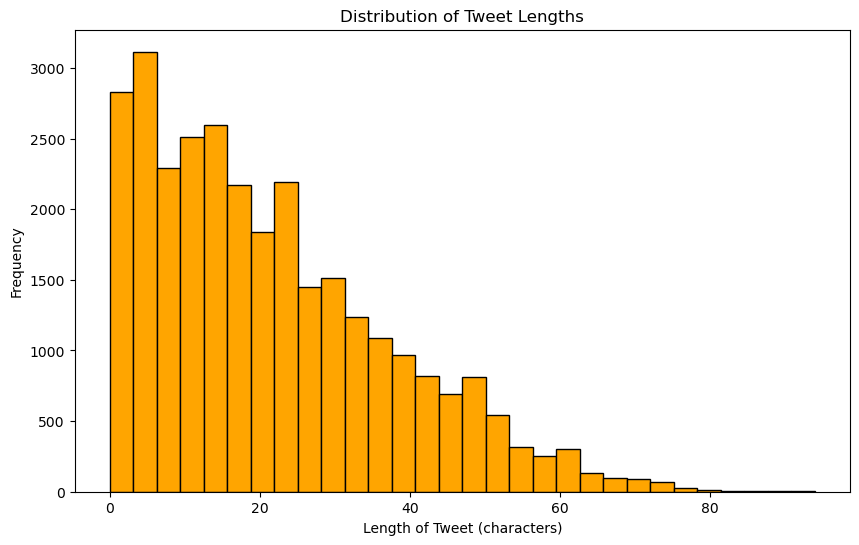

In [ ]:
df['text_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet (characters)')
plt.ylabel('Frequency')
plt.show()


#  LEXICON INTEGRATION

In [8]:
import pandas as pd
import emoji

emoji_sentiment_lexicon = {
    '😭': -1, '😊': 1, '😐': 0, '😜': 1, '😡': -1, '😂': 1, '😍': 1, '😢': -1, 
    '😏': 0, '😎': 1, '💔': -1, '💖': 1, '🔥': 1, '🌟': 1, '🥺': -1, '🤔': 0, 
    '💀': -1, '👀': 0, '😷': 0, '💩': -1, '🤩': 1, '🤡': -1, '😇': 1, '🤗': 1, 
    '😻': 1, '👑': 1, '🙌': 1, '💪': 1, '👽': 0, '🎉': 1, '🏆': 1, '💯': 1, 
    '🥳': 1, '😬': -1, '🙄': 0, '😱': -1, '😅': 0, '😳': -1, '🧐': 0, '🖤': 1, 
    '😩': -1, '😖': -1, '🫣': 0, '😒': -1,
}

def calculate_emoji_sentiment(emoji_text):
    sentiment_score = 0
    emoji_count = 0

    for emoji_char in emoji_text:
        if emoji_char in emoji_sentiment_lexicon:
            sentiment_score += emoji_sentiment_lexicon[emoji_char]
            emoji_count += 1

    return sentiment_score / emoji_count if emoji_count > 0 else 0

df['Emoji_Sentiment'] = df['emojis'].apply(calculate_emoji_sentiment)
df


,cleaned_text,emojis,text_length,Emoji_Sentiment
0,squad game,🚀,10,0.0
1,dude like dick long little carrying,🍆🤪🙃,35,0.0
2,,👇,0,0.0
3,,💀💀💀,0,-1.0
4,til schedule,,12,0.0
...,...,...,...,...
29995,best team love,😍😍😍,14,1.0
29996,wonder woman,🙅🏽♀,12,0.0
29997,giveaway win like following comment pic sugges...,💥😛💥🍌🍌🍌🍌,59,0.0
29998,describe friendship know,🤷🏼♀,24,0.0


In [ ]:

emoji_sentiment_counts = df['Emoji_Sentiment'].value_counts()
print(emoji_sentiment_counts)

Emoji_Sentiment
 0.000000    18152
 1.000000     8574
-1.000000     2686
-0.142857      135
 0.500000      132
 0.333333       78
-0.500000       77
-0.333333       55
 0.600000       16
 0.666667       15
 0.750000       11
 0.200000        9
 0.250000        6
-0.200000        5
 0.142857        5
 0.800000        5
-0.600000        5
 0.428571        4
-0.111111        4
-0.666667        4
-0.090909        2
 0.454545        2
-0.400000        1
-0.555556        1
-0.750000        1
-0.857143        1
 0.900000        1
 0.111111        1
 0.285714        1
 0.833333        1
-0.466667        1
 0.047619        1
 0.555556        1
 0.769231        1
 0.400000        1
 0.571429        1
 0.846154        1
 0.857143        1
-0.250000        1
 0.677419        1
Name: count, dtype: int64


In [ ]:
from textblob import TextBlob
import pandas as pd

def calculate_text_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity  
    else:
        return 0  
df['Text_Sentiment'] = df['cleaned_text'].apply(calculate_text_sentiment)
df.head()


,cleaned_text,emojis,text_length,Emoji_Sentiment,Text_Sentiment
0,squad game,🚀,10,0.0,-0.40000
1,dude like dick long little carrying,🍆🤪🙃,35,0.0,-0.11875
2,,👇,0,0.0,0.00000
3,,💀💀💀,0,-1.0,0.00000
4,til schedule,,12,0.0,0.00000


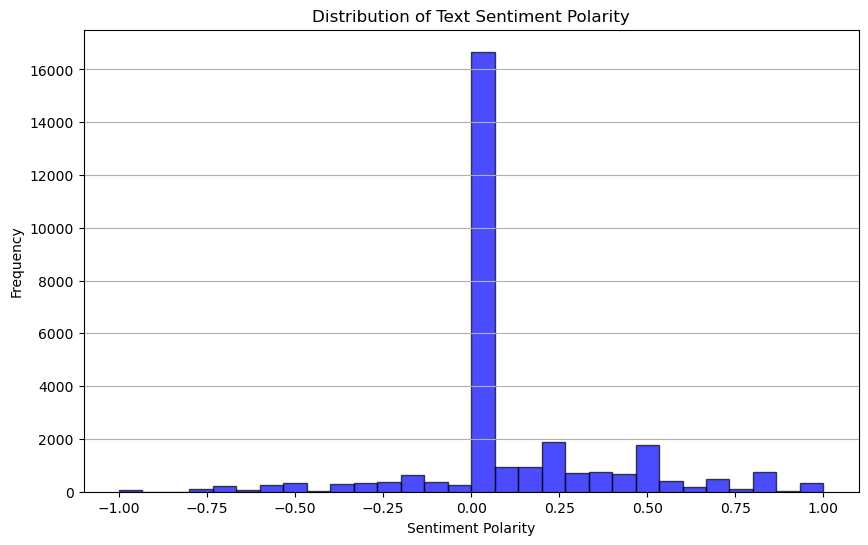

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Text_Sentiment'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Text Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [ ]:
sentiment_counts = df['Text_Sentiment'].value_counts()

print(sentiment_counts)


Text_Sentiment
 0.000000    16343
 0.500000     1616
 0.200000      862
 0.250000      726
 0.800000      604
             ...  
 0.690000        1
 0.567857        1
 0.304167        1
 0.642857        1
-0.110000        1
Name: count, Length: 896, dtype: int64


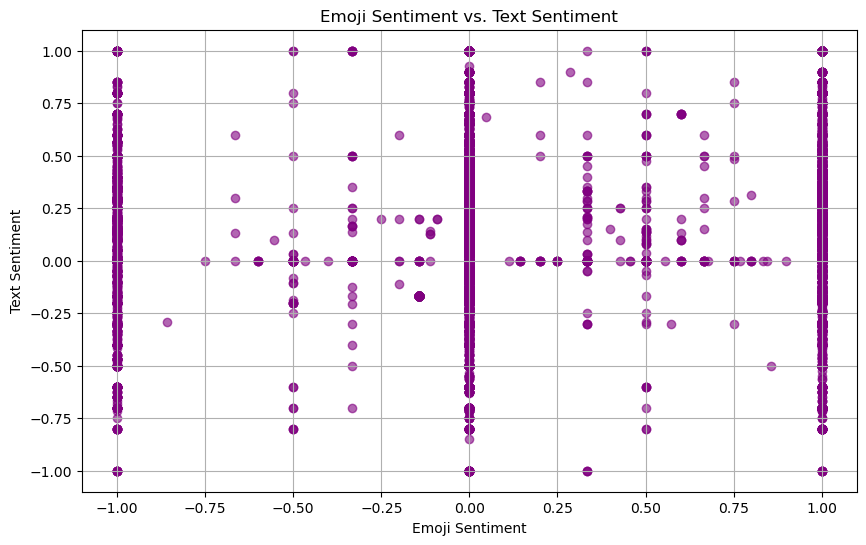

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Emoji_Sentiment'], df['Text_Sentiment'], alpha=0.6, color='purple')
plt.title('Emoji Sentiment vs. Text Sentiment')
plt.xlabel('Emoji Sentiment')
plt.ylabel('Text Sentiment')
plt.grid()
plt.show()


In [14]:
df.shape

(30000, 5)

In [ ]:
final_sentiment_weight = 0.7
emoji_sentiment_weight = 0.3  

def combine_weighted_sentiments(final_sentiment, emoji_sentiment, final_weight=0.7, emoji_weight=0.3):
    combined_sentiment = (final_sentiment * final_weight) + (emoji_sentiment * emoji_weight)
    return combined_sentiment

df['Combined_Sentiment'] = df.apply(lambda row: combine_weighted_sentiments(row['Text_Sentiment'], row['Emoji_Sentiment'], final_weight=final_sentiment_weight, emoji_weight=emoji_sentiment_weight), axis=1)

df.head()


,cleaned_text,emojis,text_length,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment
0,squad game,🚀,10,0.0,-0.40000,-0.280000
1,dude like dick long little carrying,🍆🤪🙃,35,0.0,-0.11875,-0.083125
2,,👇,0,0.0,0.00000,0.000000
3,,💀💀💀,0,-1.0,0.00000,-0.300000
4,til schedule,,12,0.0,0.00000,0.000000


In [ ]:
import pandas as pd
import numpy as np

def classify_combined_sentiment(row):
    
    combined_sentiment = row['Combined_Sentiment']
    
    if combined_sentiment > 0:
        return 'Positive'
    elif combined_sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Final_Sentiment'] = df.apply(classify_combined_sentiment, axis=1)

print(df.head())

sentiment_counts = df['Final_Sentiment'].value_counts()

                          cleaned_text emojis  text_length  Emoji_Sentiment  \
0                           squad game      🚀           10              0.0   
1  dude like dick long little carrying    🍆🤪🙃           35              0.0   
2                                           👇            0              0.0   
3                                         💀💀💀            0             -1.0   
4                         til schedule                  12              0.0   

   Text_Sentiment  Combined_Sentiment Final_Sentiment  
0        -0.40000           -0.280000        Negative  
1        -0.11875           -0.083125        Negative  
2         0.00000            0.000000         Neutral  
3         0.00000           -0.300000        Negative  
4         0.00000            0.000000         Neutral  


In [ ]:
print(sentiment_counts)

Final_Sentiment
Positive    14977
Neutral     10126
Negative     4897
Name: count, dtype: int64


In [18]:
df.head()

,cleaned_text,emojis,text_length,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment,Final_Sentiment
0,squad game,🚀,10,0.0,-0.40000,-0.280000,Negative
1,dude like dick long little carrying,🍆🤪🙃,35,0.0,-0.11875,-0.083125,Negative
2,,👇,0,0.0,0.00000,0.000000,Neutral
3,,💀💀💀,0,-1.0,0.00000,-0.300000,Negative
4,til schedule,,12,0.0,0.00000,0.000000,Neutral


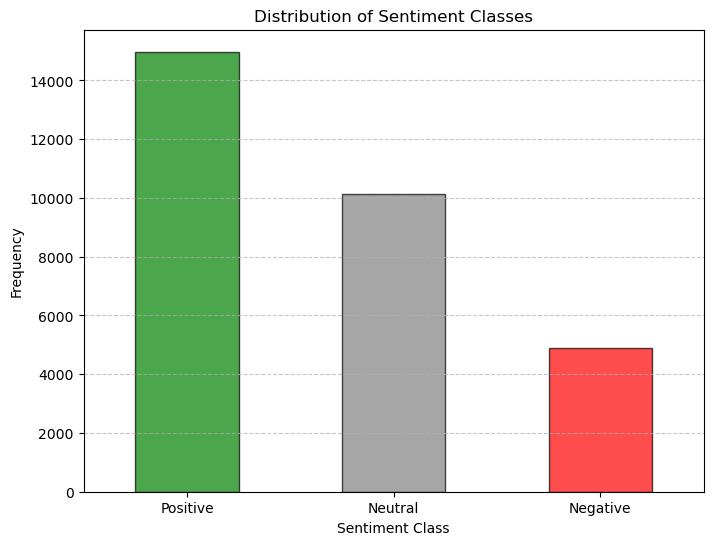

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = df['Final_Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'], alpha=0.7, edgecolor='black')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


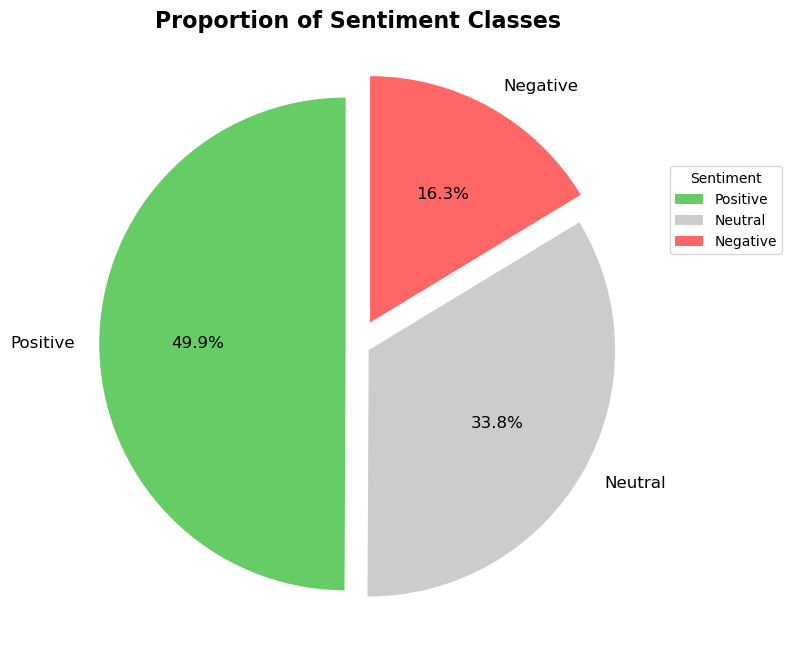

In [ ]:
import matplotlib.pyplot as plt

colors = ['#66CC66', '#CCCCCC', '#FF6666']  

plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 12},  
    explode=[0.05, 0.05, 0.1] 
)
plt.title('Proportion of Sentiment Classes', fontsize=16, weight='bold')
plt.legend(title='Sentiment', loc='upper right', fontsize=10, bbox_to_anchor=(1.2, 0.8))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Final_Sentiment_Label'] = label_encoder.fit_transform(df['Final_Sentiment'])

print(f"LabelEncoder classes: {label_encoder.classes_}")

df['Final_Sentiment_Label'] = df['Final_Sentiment_Label'].map({0: -1, 1: 0, 2: 1})
df.head()


LabelEncoder classes: ['Negative' 'Neutral' 'Positive']


,cleaned_text,emojis,text_length,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment,Final_Sentiment,Final_Sentiment_Label
0,squad game,🚀,10,0.0,-0.40000,-0.280000,Negative,-1
1,dude like dick long little carrying,🍆🤪🙃,35,0.0,-0.11875,-0.083125,Negative,-1
2,,👇,0,0.0,0.00000,0.000000,Neutral,0
3,,💀💀💀,0,-1.0,0.00000,-0.300000,Negative,-1
4,til schedule,,12,0.0,0.00000,0.000000,Neutral,0


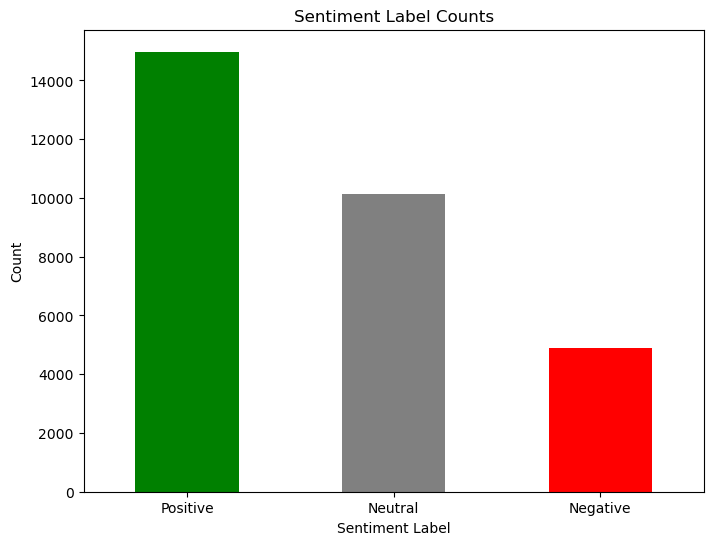

In [ ]:

sentiment_label_counts = df['Final_Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_label_counts.plot(kind='bar', color=[ 'green','grey','red', ])

plt.title('Sentiment Label Counts')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Neutral','Negative'], rotation=0)

plt.show()


# FEATURE EXTRACTION

## TF-IDF Vectorizer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=3000)  

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Dataset with TF-IDF Features:")
print(tfidf_df.head())

dataset_with_tfidf = pd.concat([df, tfidf_df], axis=1)

print("Dataset with TF-IDF Features Added:")
print(dataset_with_tfidf.head())

tfidf_df.to_csv("tfidf_features.csv", index=False)

Dataset with TF-IDF Features:
   ability  able  aboard  abortion  absolute  absolutely  accent  accept  \
0      0.0   0.0     0.0       0.0       0.0         0.0     0.0     0.0   
1      0.0   0.0     0.0       0.0       0.0         0.0     0.0     0.0   
2      0.0   0.0     0.0       0.0       0.0         0.0     0.0     0.0   
3      0.0   0.0     0.0       0.0       0.0         0.0     0.0     0.0   
4      0.0   0.0     0.0       0.0       0.0         0.0     0.0     0.0   

   accepted  access  ...  young  younger   yr  zero  zimbabwe  zip  zombie  \
0       0.0     0.0  ...    0.0      0.0  0.0   0.0       0.0  0.0     0.0   
1       0.0     0.0  ...    0.0      0.0  0.0   0.0       0.0  0.0     0.0   
2       0.0     0.0  ...    0.0      0.0  0.0   0.0       0.0  0.0     0.0   
3       0.0     0.0  ...    0.0      0.0  0.0   0.0       0.0  0.0     0.0   
4       0.0     0.0  ...    0.0      0.0  0.0   0.0       0.0  0.0     0.0   

   zone  zoo  zoom  
0   0.0  0.0   0.0  
1 

In [24]:
tfidf_df.head()

,ability,able,aboard,abortion,absolute,absolutely,accent,accept,accepted,access,...,young,younger,yr,zero,zimbabwe,zip,zombie,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tfidf_df.columns

Index(['ability', 'able', 'aboard', 'abortion', 'absolute', 'absolutely',
       'accent', 'accept', 'accepted', 'access',
       ...
       'young', 'younger', 'yr', 'zero', 'zimbabwe', 'zip', 'zombie', 'zone',
       'zoo', 'zoom'],
      dtype='object', length=3000)

## SPLIT THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset_with_tfidf.drop(['cleaned_text','emojis','Text_Sentiment','text_length','Combined_Sentiment','Final_Sentiment','Final_Sentiment_Label'], axis=1)  # Drop non-numerical columns and target columns
y = dataset_with_tfidf['Final_Sentiment_Label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.33751629, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726],
       [ 1.38391026, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726],
       [-0.33751629, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726],
       ...,
       [-0.33751629, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726],
       [ 1.38391026, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726],
       [-2.05894285, -0.0179879 , -0.02284108, ..., -0.01259185,
        -0.01080245, -0.01257726]])

In [ ]:
print(X_train_scaled.shape)  
print(y_train.dtype)  


(24000, 3001)
int64


In [29]:
y_test

2308     0
22404    1
23397   -1
25058    1
2664     1
        ..
2210     1
14144   -1
23108    1
25703    1
29171   -1
Name: Final_Sentiment_Label, Length: 6000, dtype: int64

In [30]:
!pip install xgboost

# MODEL BULDING -XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


y_train_mapped = y_train.map({-1: 0, 0: 1, 1: 2})
y_test_mapped = y_test.map({-1: 0, 0: 1, 1: 2})
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    learning_rate=0.01,   
    n_estimators=1000,     
    max_depth=10,         
    subsample=0.8,       
    colsample_bytree=0.8, 
    min_child_weight=1,  
    gamma=0.8,            
    reg_alpha=0.3,       
    reg_lambda=2,         
    scale_pos_weight=3,
     class_weight='balanced' 
)


xgb_model.fit(
    X_train_scaled, 
    y_train_mapped
)


y_pred_mapped = xgb_model.predict(X_test_scaled)

y_pred_original = pd.Series(y_pred_mapped).map({0: -1, 1: 0, 2: 1})
accuracy = accuracy_score(y_test_mapped, y_pred_mapped)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test_mapped, y_pred_mapped))


C:\Users\AB TECHNOLOGIES\New folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight", "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9257

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       942
           1       0.84      1.00      0.91      2021
           2       0.98      0.91      0.95      3037

    accuracy                           0.93      6000
   macro avg       0.93      0.91      0.92      6000
weighted avg       0.93      0.93      0.93      6000



In [ ]:
import pandas as pd
comparison_df = pd.DataFrame({
    'Actual': y_test_mapped,  
    'Predicted': y_pred_mapped 
})

total_predictions = len(comparison_df)
correct_predictions = (comparison_df['Actual'] == comparison_df['Predicted']).sum()

print(f'Total Predictions: {total_predictions}')
print(f'Correct Predictions: {correct_predictions}')
print("\nActual vs Predicted:")
print(comparison_df.head())


Total Predictions: 6000
Correct Predictions: 5554

Actual vs Predicted:
       Actual  Predicted
2308        1          1
22404       2          2
23397       0          0
25058       2          2
2664        2          2


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
y_pred = xgb_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test_mapped, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
y_pred_prob = xgb_model.predict_proba(X_test_scaled) 
test_log_loss = log_loss(y_test_mapped, y_pred_prob)
print(f'Test Log Loss: {test_log_loss:.4f}')


Test Accuracy: 0.9257
Test Log Loss: 0.2750


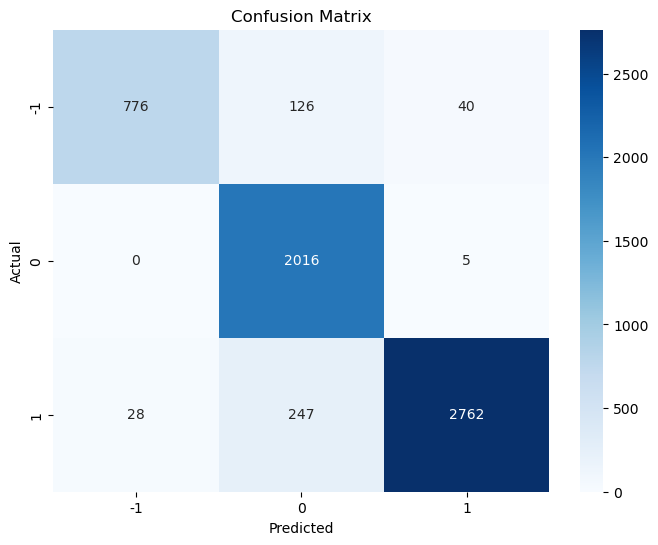

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test_mapped, y_pred_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


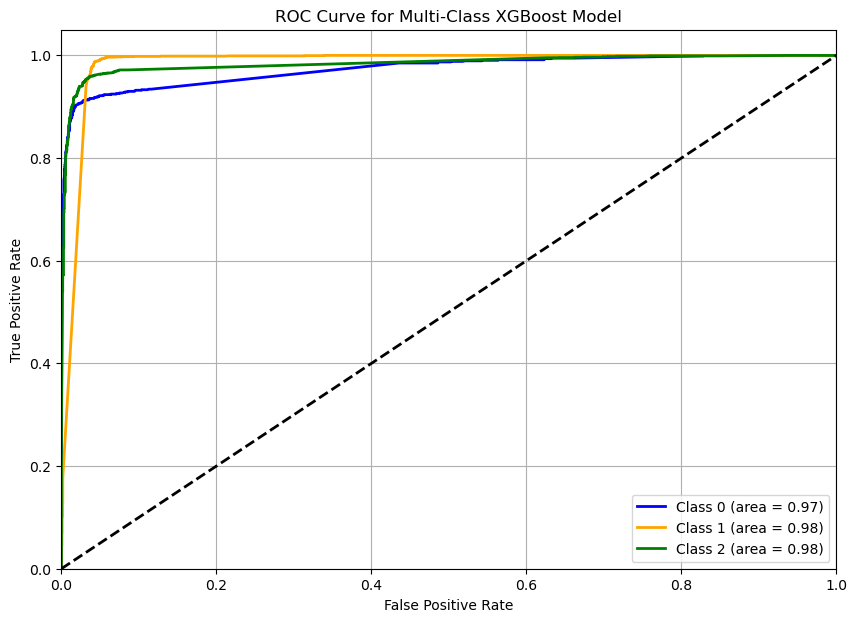

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
try:
    y_test_binarized = label_binarize(y_test.map({-1: 0, 0: 1, 1: 2}), classes=[0, 1, 2])
    y_pred_proba = xgb_model.predict_proba(X_test_scaled)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(3):  
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 7))
    colors = ['blue', 'orange', 'green']
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f"Class {i} (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class XGBoost Model')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

except NameError as e:
    print(f"Variable not defined: {e}")


In [ ]:
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
import joblib
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']